In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [174]:
facility = pd.read_csv('motor-vehicle-crashes-by-facility-port-authority-of-ny-nj-beginning-2000.csv')
case = pd.read_csv('motor-vehicle-crashes-case-information-three-year-window.csv')
individual = pd.read_csv('motor-vehicle-crashes-individual-information-three-year-window.csv')
vehicle = pd.read_csv('motor-vehicle-crashes-vehicle-information-three-year-window.csv')
violation = pd.read_csv('motor-vehicle-crashes-violation-information-three-year-window.csv')
insurance = pd.read_csv('motor-vehicle-point-insurance-reduction-program-pirp-participation-five-year-window.csv')

In [182]:
print('Facility:')
display(facility.head(3))
print('Case:')
display(case.head(3))
print('Individual:')
display(individual.head(3))
print('Vehicle:')
display(vehicle.head(3))
print('Violation:')
display(violation.head(3))
print('Insurance:')
display(insurance.head(3))

Facility:


,Facility,Year,Total Number of Motor Vehicle Crashes,Number of Fatal Crashes
0,Bayonne Bridge,2000,24,0
1,Bayonne Bridge,2001,19,1
2,Bayonne Bridge,2002,13,0


Case:


,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Property Damage Accident,8:30,2014-01-03T00:00:00,Friday,Y,Daylight,WATERTOWN,OVERTAKING,JEFFERSON,Straight and Level,Clear,None,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
1,2014,Property Damage & Injury Accident,14:48,2014-01-03T00:00:00,Friday,Y,Daylight,WATERTOWN,REAR END,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Snow/Ice,3 73022024,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage & Injury Accident,11:30,2014-01-04T00:00:00,Saturday,Y,Daylight,WATERTOWN,OTHER,JEFFERSON,Straight and Grade,Clear,None,Snow/Ice,NaN,Not Applicable,"Building/Wall, Collision With Fixed Object",1


Individual:


,Year,Case Individual ID,Case Vehicle ID,Victim Status,Role Type,Seating Position,Ejection,License State Code,Sex,Transported By,Safety Equipment,Injury Descriptor,Injury Location,Injury Severity,Age
0,2014,15799027,12117200,Conscious,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,M,Not Entered,Lap Belt/Harness,Complaint of Pain,Shoulder-Upper Arm,Minor,43.0
1,2014,15743949,12076145,Not Applicable,Passenger of a Motor Vehicle in Transport,Passenger - 3 Front Right,Not Ejected,NaN,F,Not Entered,Lap Belt/Harness,Not Applicable,Not Applicable,Uninjured,38.0
2,2014,15444687,11856196,Not Applicable,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,F,Not Entered,Lap Belt/Harness,Not Applicable,Not Applicable,Uninjured,40.0


Vehicle:


,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2014,12100031,UNKNOWN VEHICLE,Not Entered,Unknown,Not Entered,Unknown,Not Entered,NaN,NaN,NaN,NaN,NaN,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,NaN
1,2014,12638921,TAXI,Not Entered,Slowing or Stopping,Not Entered,South,Not Entered,NaN,NJ,2.0,NaN,NaN,HUMAN,Unknown,HUMAN,Not Entered,Not Entered,NaN
2,2014,12011955,UNKNOWN VEHICLE,Not Entered,Unknown,Not Entered,Unknown,Not Entered,NaN,NaN,NaN,NaN,NaN,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,NaN


Violation:


,Year,Violation Description,Violation Code,Case Individual ID
0,2014,PASSED ON RIGHT,1122A,15943211
1,2014,FOLLOWING TOO CLOSELY,1129A,15551946
2,2014,SPEED NOT REASONABLE & PRUDENT,1180A,16054549


Insurance:


,Month,Year,Age at Completion,Gender,County of Mailing Address,Sponsor,Delivery Method,Course Completion Count
0,9,2014,58,F,ONEIDA,04 - AARP,CLASSROOM,1
1,1,2015,20,M,BRONX,25 - USA TRAINING COMP,INTERNET,1
2,1,2013,43,F,ULSTER,18 - NY SAFETY PROGRAM,CLASSROOM,1


how to be safer on road:
1. how long should a person be covered by insurance
2. which seat position is safer
3. which time in a day
4. which month
5. 

# Histogram

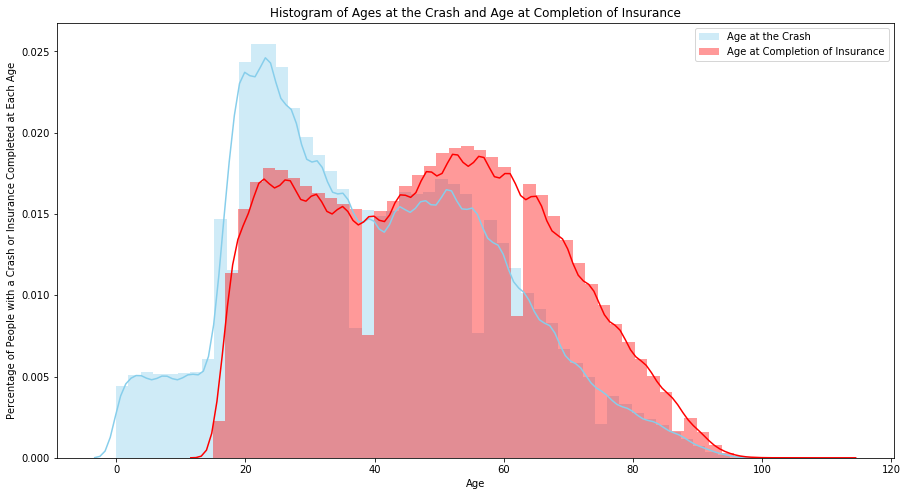

In [12]:
plt.figure(figsize=(15,8))
sns.distplot(individual["Age"].dropna() , color="skyblue", label="Age at the Crash")
sns.distplot(insurance["Age at Completion"].dropna() , color="red", label="Age at Completion of Insurance")
plt.title('Histogram of Ages at the Crash and Age at Completion of Insurance')
plt.xlabel('Age')
plt.ylabel('Percentage of People with a Crash or Insurance Completed at Each Age')
plt.legend()

# Barplot

In [23]:
# merge with vehicle dataset for vehicle type
bardata = individual.merge(vehicle, on='Case Vehicle ID', how='inner')

# only consider most common vehicle types: suburban and 4 door sedan
bardata = bardata[bardata['Vehicle Body Type'].isin(['SUBURBAN', '4 DOOR SEDAN'])]

# 'severe crash' if 'severe' or 'killed', 'not severe crash' if 'uninjured' or 'minor'
bardata = bardata[bardata['Injury Severity'].isin(['Minor', 'Uninjured', 'Severe', 'Killed'])]
bardata['Injury Severity'] = [1 if elem in ['Severe', 'Killed'] else 0 for elem in bardata['Injury Severity']]

# ignore unknown sex
bardata = bardata[bardata['Sex'].isin(['M', 'F'])]

In [27]:
bardata = bardata[~bardata['Seating Position'].isin(['Unknown Seating Passenger', 'Not Entered', 
                                                     'Riding/Hanging on Outside', 'Not Applicable',
                                                     'Unknown Position In Vehicle'])]
bardata['Seating Position'] = bardata['Seating Position'].\
                            apply(lambda x: 'Front' if 'Front' in x else 'Back' if 'Back' in x else 'Driver')
bardata.head()

,Year_x,Case Individual ID,Case Vehicle ID,Victim Status,Role Type,Seating Position,Ejection,License State Code,Sex,Transported By,...,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2014,15799027,12117200,Conscious,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,M,Not Entered,...,NY,1.0,4.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,19XFB2F5XDE223873
1,2014,15743949,12076145,Not Applicable,Passenger of a Motor Vehicle in Transport,Front,Not Ejected,NaN,F,Not Entered,...,NY,5.0,6.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,5FNYF18608B015272
2,2014,15743951,12076145,Not Applicable,Passenger of a Motor Vehicle in Transport,Back,Not Ejected,NaN,M,Not Entered,...,NY,5.0,6.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,5FNYF18608B015272
3,2014,15743948,12076145,Not Applicable,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,M,Not Entered,...,NY,5.0,6.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,5FNYF18608B015272
4,2014,15743952,12076145,Not Applicable,Passenger of a Motor Vehicle in Transport,Back,Not Ejected,NaN,M,Not Entered,...,NY,5.0,6.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,5FNYF18608B015272


Text(0.5, 0.98, 'Probability of Getting Injured Severely when Sitting in Different Positions in Cars, distinguished by Sex')

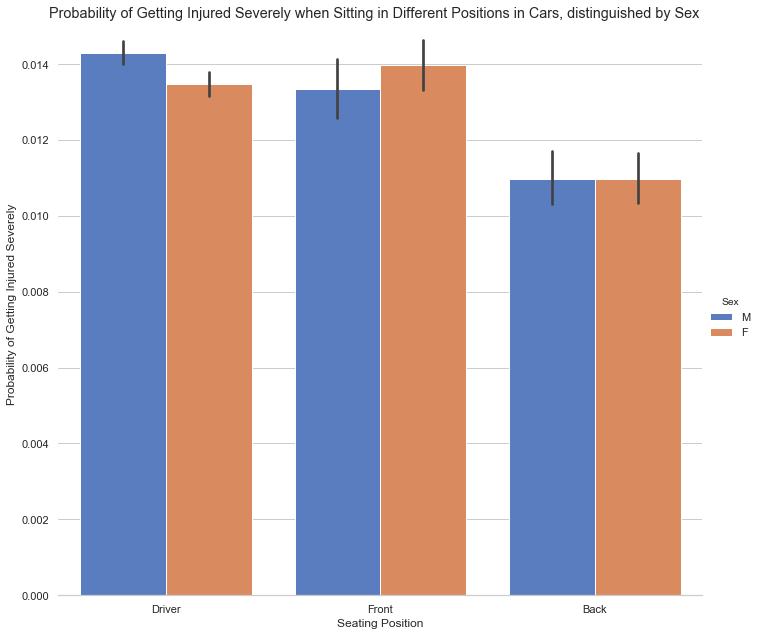

In [34]:
sns.set(style="whitegrid")
g = sns.catplot(x="Seating Position", y="Injury Severity", hue="Sex", data=bardata,
                height=9, kind="bar", palette="muted", aspect=10/9)
g.despine(left=True)
g.set_ylabels("Probability of Getting Injured Severely")
g.fig.suptitle('Probability of Getting Injured Severely when Sitting in Different Positions in Cars, distinguished by Sex')

# Boxplot

In [43]:
boxdata = case.copy()
boxdata['Hour'] = boxdata['Time'].apply(lambda x:int(x.split(':')[0]))
boxdata.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved,Hour
0,2014,Property Damage Accident,8:30,2014-01-03T00:00:00,Friday,Y,Daylight,WATERTOWN,OVERTAKING,JEFFERSON,Straight and Level,Clear,None,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2,8
1,2014,Property Damage & Injury Accident,14:48,2014-01-03T00:00:00,Friday,Y,Daylight,WATERTOWN,REAR END,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Snow/Ice,3 73022024,Not Applicable,"Other Motor Vehicle, Collision With",2,14
2,2014,Property Damage & Injury Accident,11:30,2014-01-04T00:00:00,Saturday,Y,Daylight,WATERTOWN,OTHER,JEFFERSON,Straight and Grade,Clear,None,Snow/Ice,NaN,Not Applicable,"Building/Wall, Collision With Fixed Object",1,11
3,2014,Property Damage Accident,7:45,2014-01-03T00:00:00,Friday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Clear,Stop Sign,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2,7
4,2014,Property Damage Accident,15:11,2014-01-04T00:00:00,Saturday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Cloudy,None,Wet,3 73022020,Not Applicable,"Other Motor Vehicle, Collision With",2,15


Text(0.5, 1.0, 'Boxplot of Hour at the Crash for each Dat of Week')

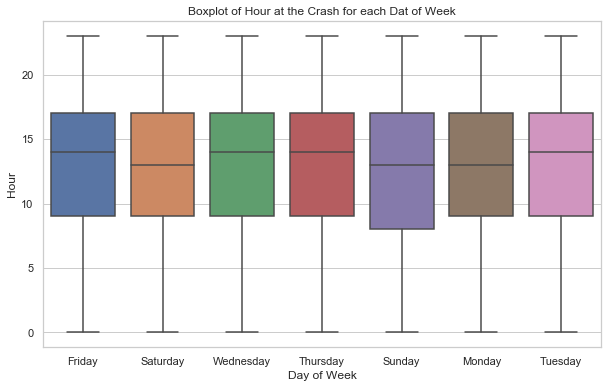

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Day of Week", y="Hour", data=boxdata)
plt.title('Boxplot of Hour at the Crash for each Dat of Week')

# Scatterplot

In [81]:
scatterdata = case.copy()
scatterdata['Date'] = scatterdata['Date'].apply(lambda x:x.split('-')[1])
scatterdata = scatterdata.groupby(['Year', 'Date']).count().\
                    reset_index()[['Year','Date','Time']].rename(columns={'Date':'Month', 'Time':'Count'})
scatterdata = scatterdata[scatterdata['Year'].isin([2014, 2015, 2016])]
scatterdata.head()

,Year,Month,Count
0,2014,01,29762
1,2014,02,24556
2,2014,03,22740
3,2014,04,20284
4,2014,05,23867


Text(0.5, 1.0, 'Scatterplot of Number of Crashes in each Month and Year')

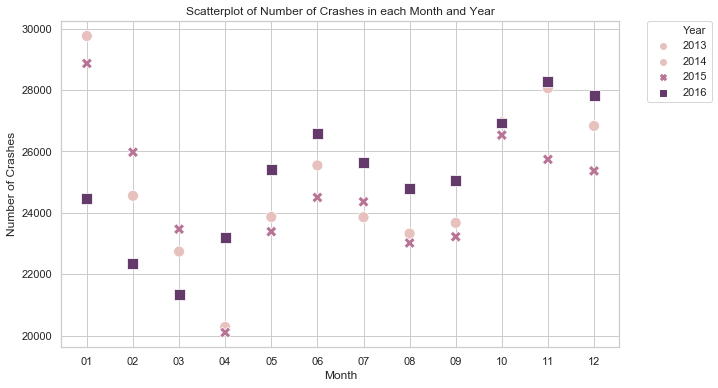

In [85]:
plt.figure(figsize=(10,6))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="Month", y="Count", hue="Year", style="Year",
                data=scatterdata, palette=cmap, s=120)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Crashes')
plt.title('Scatterplot of Number of Crashes in each Month and Year')

# Bubble Map

Tableu is used for bubble map.

# Chloropleth Map

Tableu is used for Chloropleth Map.

# Connection Map

Connection Map cannot be plotted with data from this dataset.

# Heat Map

In [127]:
heatdata = vehicle.merge(individual, on='Case Vehicle ID', how='inner')

In [102]:
# vehicles with most carsh records
[elem[0] for elem in sorted(list(Counter(heatdata['Vehicle Body Type']).items()), key=lambda x:-x[1])[:30]]

['4 DOOR SEDAN',
 'SUBURBAN',
 'PICKUP TRUCK',
 'UNKNOWN VEHICLE',
 '2 DOOR SEDAN',
 'PEDESTRIAN',
 'BUS (OMNIBUS)',
 'VAN TRUCK',
 'SEDAN',
 'BICYCLIST',
 'MOTORCYCLE',
 'TRACTOR',
 'TAXI',
 'CONVERTIBLE',
 'DUMP',
 'UNKNOWN TRUCK',
 'DELIVERY TRUCK',
 'POLICE VEHICLE',
 'UTILITY',
 'FIRE VEHICLE',
 'Not Entered',
 'UNKNOWN CAR',
 'FLAT BED TRUCK',
 'TOW TRUCK',
 'AMBULANCE',
 'REFRIGERATOR TRUCK',
 'TANK TRUCK',
 'OTHER PEDESTRIAN',
 'STAKE TRUCK',
 'HOUSE ON WHEELS']

In [105]:
# vehicle types in consideration
vehicle_type = {'4 DOOR SEDAN': 'sedan',
                 'SUBURBAN': 'suburban',
                 'PICKUP TRUCK': 'truck',
                 '2 DOOR SEDAN': 'sedan',
                 'PEDESTRIAN': 'pedestrian',
                 'BUS (OMNIBUS)': 'bus',
                 'VAN TRUCK': 'truck',
                 'SEDAN': 'sedan',
                 'BICYCLIST': 'bicycle',
                 'MOTORCYCLE': 'motorcycle',
                 'TAXI': 'taxi',
                 'CONVERTIBLE': 'convertible',
                 'UNKNOWN TRUCK': 'truck',
                 'DELIVERY TRUCK': 'truck',
                 'FLAT BED TRUCK': 'truck',
                 'TOW TRUCK': 'truck',
                 'REFRIGERATOR TRUCK': 'truck',
                 'TANK TRUCK': 'truck',
                 'OTHER PEDESTRIAN': 'pedestrian',
                 'STAKE TRUCK': 'truck',
                 'HOUSE ON WHEELS': 'house on wheels'}

In [128]:
heatdata = heatdata[heatdata['Vehicle Body Type'].isin(vehicle_type)]
heatdata['Vehicle Body Type'] = heatdata['Vehicle Body Type'].apply(lambda x: vehicle_type[x])
heatdata2 = heatdata[['Vehicle Body Type', 'Injury Severity', 'Age']]
heatdata2 = heatdata2[heatdata2['Injury Severity']!='Injured with Unkn Severity']
totals = heatdata2.groupby('Vehicle Body Type').count().reset_index()[['Vehicle Body Type', 'Age']].rename(columns={'Age':'Totals'})
heatdata2 = heatdata2.groupby(['Vehicle Body Type', 'Injury Severity']).count().reset_index().rename(columns={'Age':'Count'})
heatdata2 = heatdata2.merge(totals, on='Vehicle Body Type')
heatdata2['Percentage'] = heatdata2['Count']/heatdata2['Totals']
heatdata2.head()

,Vehicle Body Type,Injury Severity,Count,Totals,Percentage
0,bicycle,Killed,119,15997,0.007439
1,bicycle,Minor,8882,15997,0.555229
2,bicycle,Moderate,5067,15997,0.316747
3,bicycle,Severe,1656,15997,0.103519
4,bicycle,Uninjured,273,15997,0.017066


Text(0.5, 1.0, 'Heat Map of Percentage of Crashes at each Injury Severity Level with different Vehicle Type')

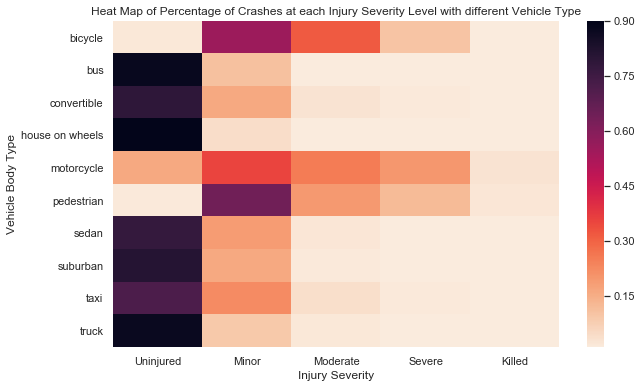

In [146]:
plt.figure(figsize=(10,6))
heat = heatdata2.pivot("Injury Severity", "Vehicle Body Type", "Percentage")
heat.index = pd.CategoricalIndex(heat.index, categories= ["Uninjured", 'Minor', 'Moderate', 'Severe', 'Killed'])
heat.sort_index(level=0, inplace=True)
heat = heat.transpose()
cmap = sns.cm.rocket_r
sns.heatmap(heat, vmin=0.01, vmax=0.9, cmap=cmap)
plt.title('Heat Map of Percentage of Crashes at each Injury Severity Level with different Vehicle Type')

# Stacked area graph

Tableu is used for stacked area graph.

# Treemapping

Tableu is used for treemap.

# An interactive plot

In [175]:
facility.head()

,Facility,Year,Total Number of Motor Vehicle Crashes,Number of Fatal Crashes
0,Bayonne Bridge,2000,24,0
1,Bayonne Bridge,2001,19,1
2,Bayonne Bridge,2002,13,0
3,Bayonne Bridge,2003,13,0
4,Bayonne Bridge,2004,11,0


In [176]:
interdata = facility.copy()

In [181]:
i = 1
data = []
for f in np.unique(interdata.Facility):
    d = interdata[interdata['Facility']==f]
    trace = go.Scatter(
        x = list(range(2000, 2016)),
        y = d['Total  Number of Motor Vehicle Crashes'],
        mode = 'lines',
        marker = dict(
            size = 10),
        name = f
    )
    data.append(trace)
    i += 1

layout= go.Layout(
    title= 'Total Number of Motor Vehicle Crashes at Different Facilities from 2000 to 2015',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Number of Motor Vehicle Crashes',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename='final_interactive_plot')